<a href="https://colab.research.google.com/github/Raziel-jm-code/LinkedIn_Proyecto/blob/main/LinkedIn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Conexiones de LinkedIn: Prediccion por Genero en dos años



## 1. Definición del Problema ##

> Añadir blockquote

> Añadir blockquote





### Descripción del Problema
El problema a abordar es la identificación de géneros en los perfiles de LinkedIn y la distribución de conexiones. Este análisis ayuda a entender la diversidad de género en diferentes compañías y posiciones.

### Justificación
El análisis de la red de contactos permite identificar empresas y profesionales clave en nuestro sector, descubrir nuevas oportunidades laborales y de networking, y entender cómo se posiciona nuestra red en relación a otros profesionales.

### Objetivos Específicos
1. Determinar la distribución de géneros en perfiles de LinkedIn.
2. Analizar la distribución de conexiones por género.
3. Visualizar la evolución temporal de las conexiones.
4. Predecir el crecimiento futuro de la red de contactos.

## 2. Selección de la Red Neuronal ##

### Justificación de la Elección
Se seleccionó una red neuronal basada en la capacidad de manejar datos categóricos y numéricos, combinando capas densas con capas de embebido para características categóricas.

### Arquitectura de la Red Neuronal


*  **Tipo**: Red Neuronal Artificial (ANN) secuencial.

**Capas**:
- **Entrada**: 4 neuronas (año, mes, día, día de la semana).
- **Oculta 1**: 64 neuronas, activación ReLU.
- **Oculta 2**: 32 neuronas, activación ReLU.
- **Salida**: 1 neurona (predicción de nuevas conexiones).

**Hiperparámetros**:
- **Optimizador**: Adam
- **Función de pérdida**: Error Cuadrático Medio (MSE)
- **Épocas**: 100
- **Tamaño del lote**: 32

**Ventajas de la arquitectura**:
- **Simplicidad y facilidad de implementación**.
- **Capacidad para modelar relaciones no lineales**.

**Desventajas de la arquitectura**:
- **Riesgo de sobreajuste (mitigado con técnicas de regularización)**.
- **Requiere una cantidad considerable de datos para un entrenamiento efectivo**.

## 3. Preprocesamiento y Preparación de Datos##

**1. Exportación de contactos:**

* Se accede a LinkedIn https://www.linkedin.com/in/raziel-jimenez-mendoza/ ,dar click en " Yo" y seleccionar "Ajustes y privacidad"
![link texto0](https://drive.google.com/uc?id=1DfFDLsMc18Jw8zZvxmDeLQx8AjCxTPm0)

* Selecciona "Privacidad de datos" y se da clic en "Obtener una copia de tus datos"
![link texto0](https://drive.google.com/uc?id=1mfDlWScRnLr7onsFFNHDry-DoeDuAh2u)

* Se elige la opción
![link texto0](https://drive.google.com/uc?id=1mt-W-kPmHjZ8kwq9_hyOif7Ewji-gKkb)


* Se selecciona "¿Quieres algo en concreto? Selecciona los archivos de datos que más te interesan", y se elige "Contactos" y para finalizar en click "Solicitar archivo".
![link texto0](https://drive.google.com/uc?id=1mt-W-kPmHjZ8kwq9_hyOif7Ewji-gKkb)

* Esperar 10 minutos para que poder descargar el archivo .csv
* Guarda el archivo CSV en tu computadora.

**2. Carga de datos en Colab:**

* Se sube el archivo CSV a Google Colab
* Fuente de datos: Archivo CSV exportado desde LinkedIn, con información sobre los contactos (nombre, apellido, empresa, posición, fecha de conexión).

**3. Instalación de bibliotecas:**

Instalar biblioteca gender-detector



In [1]:
pip install gender-detector

Instalar biblioteca ploty para crear gráficos interactivos

In [2]:
pip install plotly


Instalar biblioteca pyvis para visualizaciones de redes interactivas (grafos)

In [3]:
pip install pyvis

Importanfo bibliotecas

In [4]:
import pandas as pd
from gender_detector import gender_detector as gd
from datetime import date
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from datetime import datetime

##  Análisis Exploratorio de Datos (EDA)  
### Técnicas de Preprocesamiento

Lee el archivo CSV, saltando la primera fila y usando comas como delimitador

In [5]:
df_connections = pd.read_csv('/content/Connections.csv', delimiter=',', encoding='utf-8')


Muestra las 2 primeras filas

In [6]:
 df_connections.head(1)

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
0,Silvia,Barrera París,https://www.linkedin.com/in/silviabarreraparis,NaN,Google,"Sr. Strategic Partnerships Manager, Commerce -...",17-may-24


Mostrar información resumida

In [7]:
df_connections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     232 non-null    object
 1   Last Name      232 non-null    object
 2   URL            232 non-null    object
 3   Email Address  5 non-null      object
 4   Company        195 non-null    object
 5   Position       195 non-null    object
 6   Connected On   235 non-null    object
dtypes: object(7)
memory usage: 13.0+ KB


####Limpieza de Datos:

Verificar valores faltantes

In [8]:

print(df_connections.isnull().sum())

First Name         3
Last Name          3
URL                3
Email Address    230
Company           40
Position          40
Connected On       0
dtype: int64


Llenar valores faltantes o eliminar filas/columnas con valores faltantes

In [10]:
df_connections = df_connections.fillna(method='ffill')  # Rellenar hacia adelante como ejemplo

Mostrar la cantidad de valores únicos en cada columna

In [12]:
print(df_connections.nunique())


First Name       193
Last Name        227
URL              232
Email Address      5
Company          149
Position         184
Connected On     108
dtype: int64


Conociendo valores nulos

In [13]:
df_connections.isnull().sum()


First Name        0
Last Name         0
URL               0
Email Address    76
Company           0
Position          0
Connected On      0
dtype: int64

#### Justificación de las Técnicas
La limpieza y normalización son cruciales para eliminar ruido y escalas dispares, mientras que la codificación permite que las redes neuronales procesen datos categóricos de manera eficiente.

Estadísticas descriptivas

In [15]:
print(df_connections.describe(include='all'))

       First Name Last Name  \
count         235       235   
unique        193       227   
top       Armando  Martínez   
freq            4         3   

                                                      URL  \
count                                                 235   
unique                                                232   
top     https://www.linkedin.com/in/projectmanagements...   
freq                                                    2   

                 Email Address                  Company  \
count                      159                      235   
unique                       5                      149   
top     nellyhdezp@hotmail.com  INROADS DE MÉXICO, A.C.   
freq                        77                       17   

                          Position Connected On  
count                          235          235  
unique                         184          108  
top     Talent Acquisition Partner  14 Dec 2023  
freq                             6        

## 4. Análisis de Conexiones##
- **Top 15 de Empresas con Más Conexiones en LinkedIn**

Detalles de Trabajo (Compañias y posiciones)

In [16]:
 df_connections.iloc[:, [4,5,6]].head()

,Company,Position,Connected On
0,Google,"Sr. Strategic Partnerships Manager, Commerce -...",17-may-24
1,Google,"Sr. Strategic Partnerships Manager, Commerce -...",16-may-24
2,Vibe Wireless LLC,Software Developer,16-may-24
3,Concepto Móvil,Cloud Engineer,15-may-24
4,Coderhouse,Referente de Gestión de Talentos Académicos,15-may-24


Analizar las compañias desde la cantidad de conexiones

In [17]:
df_connections_company = df_connections['Company'].value_counts().rename_axis('Company').reset_index(name='cantidad').sort_values(by='cantidad', ascending=False)
df_connections_company.head()

,Company,cantidad
0,"INROADS DE MÉXICO, A.C.",17
1,BBVA en México,13
2,BOOTCAMP INSTITUTE,8
3,Autónomo,6
4,Salud y Vida Condesa SA de CV,4



#### Gráfico de barras horizontales

In [20]:
# Filtrar el DataFrame para obtener el top 15 de empresas
top_15_companies = df_connections['Company'].value_counts().head(15).reset_index()
top_15_companies.columns = ['Company', 'cantidad']

# Crear el gráfico de barras horizontales
fig = px.bar(top_15_companies, x='cantidad', y='Company',
             labels={'cantidad': 'Conexiones por compañía'},
             height=600,
             orientation='h')

# Personalizar el estilo de las barras
fig.update_traces(marker_color='rgb(158,202,225)',
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5,
                  opacity=0.6)

# Personalizar el diseño del gráfico
fig.update_layout(title_text='Top 15 de Empresas con Más Conexiones en LinkedIn',
                  xaxis_title='Cantidad de Conexiones',
                  yaxis_title='Empresa')

# Mostrar el gráfico
fig.show()


Filtro por Posicion para saber que puesto es el que tiene mas conexiones en mi perfil

In [21]:
df_position_filter = df_connections.groupby(['Company','Position'])['Connected On'].count().reset_index(name='cantidad').sort_values(by='cantidad', ascending=False)
df_position_filter.head()

,Company,Position,cantidad
158,Salud y Vida Condesa SA de CV,Auxiliar de RR. HH.,4
27,BBVA en México,Talent Acquisition Partner,4
45,CINVESTAV,Research Internship,3
171,Tata Consultancy Services,Information Technology Trainee,3
150,Qualis Technologies,Diseñador Funcional,3


Filtro para mayores a 2

In [22]:
df_position_filter = df_position_filter[df_position_filter['cantidad'] > 2]

- **Conexiones en Linkedin por roles**

####  Gráfico de barras horizontales que visualiza la distribución de conexiones de LinkedIn por roles

In [23]:

fig = px.bar(df_position_filter, x='cantidad', y='Position',
             labels={'cantidad': 'Conexiones por roles'},
             height=400,
             orientation='h')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Conexiones en Linkedin por roles')

fig.show()


- **Distribución de fechas de conexión**


Recupera la fecha

In [52]:
df_connections_count = df_connections.groupby('Connected On')['First Name'].count().reset_index(name='Count').sort_values(by='Count', ascending=False)

In [53]:
df_connections_count.head()

,Connected On,Count
32,2023-12-14,20
87,2024-04-17,14
86,2024-04-16,14
33,2023-12-15,12
62,2024-02-27,6


Veridficando datos de fecha

In [54]:
df_connections.iloc[:,[6]].head()


,Connected On
0,2024-05-17
1,2024-05-16
2,2024-05-16
3,2024-05-15
4,2024-05-15


Cantidad de conexiones que ocurrieron en cada fecha

In [55]:
df_connections_count = df_connections.groupby('Connected On')['First Name'].count().reset_index(name='Count').sort_values(by='Connected On')

Muestra las primeras filas

In [56]:
print(df_connections_count.head())
print(df_connections['Connected On'].head(10))

  Connected On  Count
0   2023-09-05      1
1   2023-09-07      1
2   2023-09-14      1
3   2023-09-18      1
4   2023-09-21      1
0   2024-05-17
1   2024-05-16
2   2024-05-16
3   2024-05-15
4   2024-05-15
5   2024-05-14
6   2024-05-13
7   2024-05-10
8   2024-05-09
9   2024-05-09
Name: Connected On, dtype: datetime64[ns]


Distribución por fecha de conexion

In [58]:
# Crear la figura
fig = go.Figure()

# Agregar los datos de barras al gráfico
fig.add_trace(go.Bar(x=df_connections_count['Connected On'], y=df_connections_count['Count']))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Distribución de fechas de conexión',
    xaxis_title='Fecha de conexión',
    yaxis_title='Frecuencia',
    xaxis=dict(tickangle=-45) # Girar etiquetas del eje x para mejor legibilidad
)

# Mostrar el gráfico
fig.show()

- **Distribución de fechas de conexión por mes y compañía**

Corroborar de que la columna 'Connected On' esté en formato de fecha

In [59]:
df_connections['Connected On'] = pd.to_datetime(df_connections['Connected On'])

Crear una nueva columna para el mes y año de la conexión

In [61]:
df_connections['Month_Year'] = df_connections['Connected On'].dt.to_period('M')

Agrupar por mes y año y compañía, y contar las conexiones

In [63]:
monthly_connections = df_connections.groupby(['Month_Year', 'Company']).size().reset_index(name='Count')

Convertir 'Month_Year' a un formato de fecha para ordenar correctamente

In [65]:
monthly_connections['Month_Year'] = pd.to_datetime(monthly_connections['Month_Year'].astype(str))

Ordenar por mes y año

In [66]:
monthly_connections = monthly_connections.sort_values(by='Month_Year')


### Crear el gráfico de barras con colores diferentes para cada compañías

In [103]:

fig = px.bar(monthly_connections, x='Month_Year', y='Count', color='Company',
             title='Distribución de fechas de conexión por mes y compañía',
             labels={'Month_Year': 'Mes y año de conexión', 'Count': 'Frecuencia'})

# Personalizar el diseño del gráfico
fig.update_layout(
    xaxis_title='Mes y año de conexión',
    yaxis_title='Frecuencia',
    xaxis=dict(tickformat='%Y-%m', tickangle=-45),  # Formatear etiquetas del eje x
    height=600,  # Altura del gráfico en píxeles
    width=1500   # Ancho del gráfico en píxeles
)

# Mostrar el gráfico
fig.show()

- **Distribución de fechas de conexión por mes y compañía**

Primero agrupamos los datos por mes y sumamos las conexiones

In [115]:
monthly_connections_total = monthly_connections.groupby('Month_Year')['Count'].sum().reset_index()

Convertimos las fechas en 'Month_Year' a nombres de meses y años

In [116]:
monthly_connections_total['Month_Year'] = pd.to_datetime(monthly_connections_total['Month_Year'])
monthly_connections_total['Month_Year'] = monthly_connections_total['Month_Year'].dt.strftime('%B-%Y')  # %B muestra el nombre completo del mes


### Crear el gráfico de barras

In [117]:

fig = px.bar(monthly_connections_total, x='Month_Year', y='Count',
             title='Total de conexiones por mes',
             labels={'Month_Year': 'Mes y año', 'Count': 'Total de conexiones'},
             color='Month_Year')  # Utilizamos 'Month_Year' como variable de color

# Personalizamos el diseño del gráfico
fig.update_layout(
    xaxis_title='Mes y año',
    yaxis_title='Total de conexiones',
    height=600,  # Altura del gráfico en píxeles
    width=1500   # Ancho del gráfico en píxeles
)

# Mostramos el gráfico
fig.show()




- **Número total de compañías y conexiones por año**

Crear una nueva columna para el año de la conexión


In [118]:
df_connections['Year'] = df_connections['Connected On'].dt.year


Agrupar por año y contar las compañías única

In [119]:
yearly_companies = df_connections.groupby('Year')['Company'].nunique().reset_index(name='Num_Companies')

Contar el total de conexiones por año

In [120]:
total_connections = df_connections.groupby('Year').size().reset_index(name='Total_Connections')

Combinar los dataframes para tener ambos valores juntos

In [123]:
yearly_data = pd.merge(yearly_companies, total_connections, on='Year')

### Crear el gráfico de barras de Número total de compañías y conexiones por año

In [122]:

fig = px.bar(yearly_data, x='Year', y=['Num_Companies', 'Total_Connections'],
             title='Número total de compañías y conexiones por año',
             labels={'Year': 'Año', 'value': 'Cantidad', 'variable': 'Tipo'},
             color_discrete_sequence=['blue', 'orange'],
             barmode='group')

# Personalizar el diseño del gráfico
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Cantidad',
    xaxis=dict(tickmode='linear'),  # Establecer el modo de las marcas del eje x a lineal
    height=600,  # Altura del gráfico en píxeles
    width=1000   # Ancho del gráfico en píxeles
)

# Mostrar el gráfico
fig.show()

- **Mapa de arból o Treemap de las 50 principales compañías y sus posiciones**


Calcular el número de conexiones por compañía

In [124]:
top_company = df_connections.groupby('Company').size().reset_index(name='Num_Connections')

Ordenar las compañías por el número de conexiones en orden descendente

In [125]:
top_company = top_company.sort_values(by='Num_Connections', ascending=False)

Visualizacion para top_Company

In [126]:
top_company.head()

,Company,Num_Connections
74,"INROADS DE MÉXICO, A.C.",17
13,BBVA en México,13
14,BOOTCAMP INSTITUTE,8
9,Autónomo,6
11,B-DRIVE-IT,4


Crear el treemap con las 50 principales compañías y sus posiciones

In [128]:
# Crear el treemap
fig5 = px.treemap(top_company[:50], path=['Company'], values='Num_Connections', template='ggplot2')

# Añadir un título al treemap
fig5.update_layout(title_text="Mapa de árbol de las 50 principales compañías y sus posiciones")

# Mostrar el treemap
fig5.show()

Verificando la informacion del Mapa de árbol

In [131]:
top_company.head()

,Company,Num_Connections
74,"INROADS DE MÉXICO, A.C.",17
13,BBVA en México,13
14,BOOTCAMP INSTITUTE,8
9,Autónomo,6
11,B-DRIVE-IT,4


- **Grafo de conexiones entre posiciones para Compañias**

Filtrar las compañías con al menos 1 conexión

In [138]:
filtered_top_company = top_company[top_company['Num_Connections'] >= 1]


In [143]:
print(filtered_top_company.head())


                    Company  Num_Connections
74  INROADS DE MÉXICO, A.C.               17
13           BBVA en México               13
14       BOOTCAMP INSTITUTE                8
9                  Autónomo                6
11               B-DRIVE-IT                4


In [142]:
g = nx.Graph()
g.add_node('root')  # Inicializa como el nodo central

Añadir nodos y aristas para cada empresa

In [151]:
for _, row in filtered_top_company.iterrows():
    company = row['Company']
    num_connections = row['Num_Connections']
    title = f"{company} - {num_connections}"

Obtener posiciones únicas para la empresa

In [153]:
    positions = set(df_connections[df_connections['Company'] == company]['Position'])
    positions_str = "\n".join(positions)
    hover_info = f"{company}: {positions_str}"


Añadir nodo de empresa con atributos

In [154]:
    g.add_node(company, size=num_connections * 2, title=hover_info, color="#ffa500")
    g.add_edge('root', company, color='yellow')

Dibujar el gráfico con etiquetas, tamaños y colores especificados

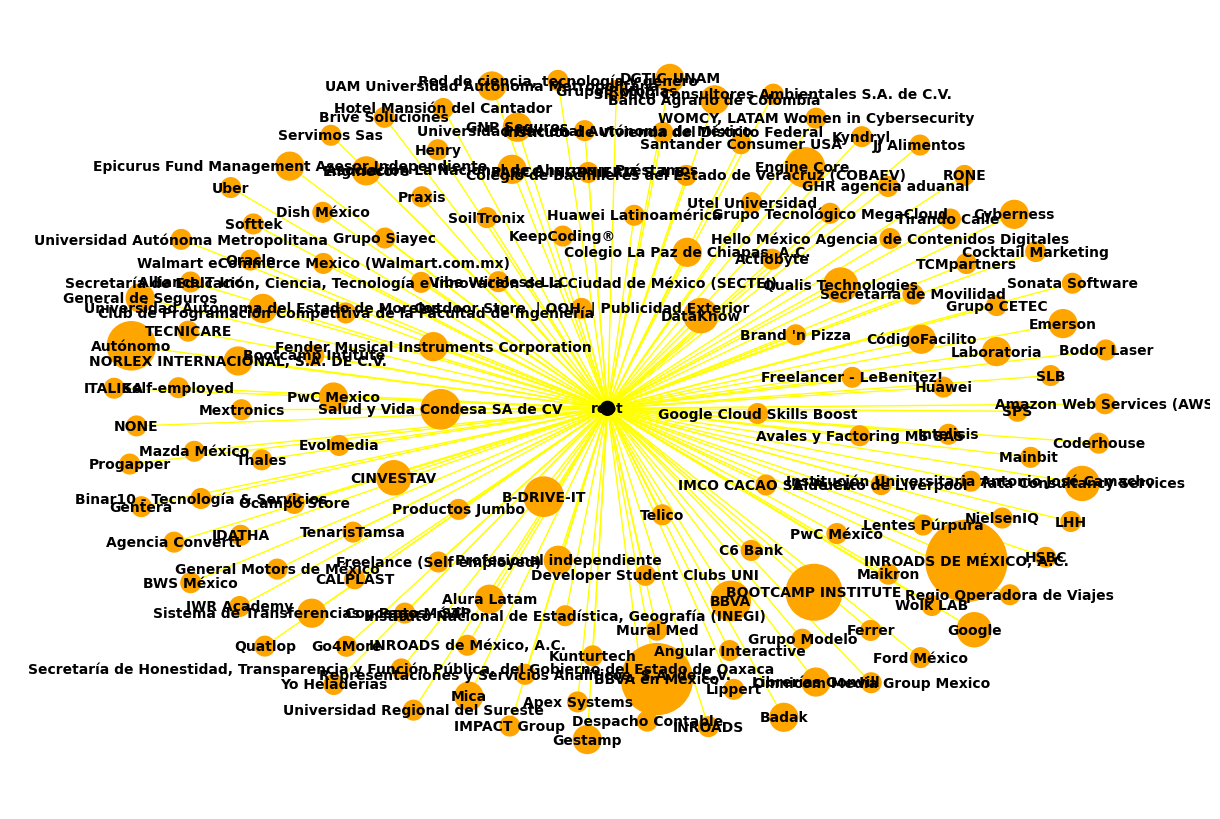

In [155]:
pos = nx.spring_layout(g)
sizes = [g.nodes[node]['size'] * 100 if 'size' in g.nodes[node] else 100 for node in g.nodes]  # Scale sizes for better visualization
colors = [g.nodes[node]['color'] if 'color' in g.nodes[node] else '#000000' for node in g.nodes]

plt.figure(figsize=(12, 8))
nx.draw(g, pos, with_labels=True, node_size=sizes, node_color=colors, edge_color='yellow', font_size=10, font_color='black', font_weight='bold')
plt.show()

- **Tratamiento en el nombre para detectar los generos**

Empezamos a trabajar con los nombres para detectar el genero

In [158]:
df_connections.iloc[:,[0]].head()

,First Name
0,Silvia
1,Berenice
2,Ramses
3,Uriel Enrique
4,Andrea Lorena


Separar el nombre y quedarnos solo con el primero

In [160]:
name = df_connections["First Name"].str.split(expand=True)

# Verifica cuántas columnas se han creado
print(name.head())

# Si la columna "First Name" se divide en cuatro columnas, asigna cuatro nombres de columnas
if len(name.columns) == 4:
    name.columns = ['first', 'second', 'third', 'fourth']
else:
    print("El número de columnas después de dividir no es el esperado.")
df_connections = pd.concat([df_connections, name], axis=1)
df_connections.iloc[:,[0,5,6,7,8,9]].head()

          0        1     2
0    Silvia     None  None
1  Berenice     None  None
2    Ramses     None  None
3     Uriel  Enrique  None
4    Andrea   Lorena  None
El número de columnas después de dividir no es el esperado.


,First Name,Position,Connected On,Month_Year,Year,0
0,Silvia,"Sr. Strategic Partnerships Manager, Commerce -...",2024-05-17,2024-05,2024,Silvia
1,Berenice,"Sr. Strategic Partnerships Manager, Commerce -...",2024-05-16,2024-05,2024,Berenice
2,Ramses,Software Developer,2024-05-16,2024-05,2024,Ramses
3,Uriel Enrique,Cloud Engineer,2024-05-15,2024-05,2024,Uriel
4,Andrea Lorena,Referente de Gestión de Talentos Académicos,2024-05-15,2024-05,2024,Andrea


Establecemos "US", region USA

In [161]:
detector = gd.GenderDetector('us')

Detector de genero

In [171]:
detector.guess('Betty')

'female'

Determinar el género de un nombre usando un detector de género

In [172]:
def gender_detector(x):
    try:
        # Intenta adivinar el género utilizando el detector previamente definido
        gender = detector.guess(x)
        return gender  # Devuelve el género inferido si se detecta correctamente
    except:
        return 'no detectó'  # Devuelve 'no detectó' si no se puede detectar el género


Predice el género de cada nombre en la columna "First Name"

In [173]:
df_connections['gender'] = df_connections['First Name'].apply(lambda x: gender_detector(x))


In [174]:
df_connections.gender.value_counts()

gender
unknown    100
male        82
female      53
Name: count, dtype: int64

Detectamos cuales fueron los nombres que no identificó el genero para tratarlos: Desconocidos

In [175]:
df2 = df_connections.loc[df_connections.gender == 'unknown']

In [176]:
df2.iloc[:,[0,5,6,7,8,9]].head()

,First Name,Position,Connected On,Month_Year,Year,0
3,Uriel Enrique,Cloud Engineer,2024-05-15,2024-05,2024,Uriel
4,Andrea Lorena,Referente de Gestión de Talentos Académicos,2024-05-15,2024-05,2024,Andrea
6,Alejandra,M&A Financial Lead,2024-05-13,2024-05,2024,Alejandra
8,Jesus,Miembro del Pool de Talento,2024-05-09,2024-05,2024,Jesús
9,Bere,Language acquisition/English Teacher. Phases 4...,2024-05-09,2024-05,2024,Bere


Por otro lado identificamos los nombres que directamente se descartaron (0 'no detectó')

In [177]:
df_null = df_connections.loc[df_connections.gender == 'no detecto']
df_null.iloc[:,[0,5]].head()

,First Name,Position


Removemos los caracteres especiales de first_name

Explicar que hace unicodedata

In [178]:
import unicodedata

Define la función para eliminar los acentos

In [179]:
def remove_accents(input_str):
    if isinstance(input_str, str):  # Verifica si la entrada es una cadena
        # Normaliza la cadena de entrada utilizando la forma NFKD
        nfkd_form = unicodedata.normalize('NFKD', input_str)
        # Codifica la cadena normalizada en ASCII, ignorando los caracteres que no se pueden convertir
        only_ascii = nfkd_form.encode('ASCII', 'ignore')
        # Decodifica la cadena ASCII resultante en UTF-8 para obtener la cadena sin acentos
        return only_ascii.decode('utf-8')
    else:
        return input_str  # Devuelve el valor original si no es una cadena

Aplica la función remove_accents a la columna 'First Name' después de manejar los valores NaN

In [180]:
df_connections['First Name'] = df_connections['First Name'].fillna('').apply(remove_accents)

Muestra los primeros registros después de aplicar la función

In [184]:
print(df_connections.head())

      First Name       Last Name  \
0         Silvia   Barrera París   
1       Berenice       Gutiérrez   
2         Ramses        Cevallos   
3  Uriel Enrique  Arellano López   
4  Andrea Lorena        Chimento   

                                                 URL Email Address  \
0     https://www.linkedin.com/in/silviabarreraparis           NaN   
1  https://www.linkedin.com/in/berenice-guti%C3%A...           NaN   
2        https://www.linkedin.com/in/ramses-cevallos           NaN   
3         https://www.linkedin.com/in/uriel-arellano           NaN   
4  https://www.linkedin.com/in/andrea-lorena-chim...           NaN   

             Company                                           Position  \
0             Google  Sr. Strategic Partnerships Manager, Commerce -...   
1             Google  Sr. Strategic Partnerships Manager, Commerce -...   
2  Vibe Wireless LLC                                 Software Developer   
3     Concepto Móvil                                     Cloud

Observando los generos, grafico, posiciones

In [185]:
df_connections_gender = df_connections['gender'].value_counts().rename_axis('Gender').reset_index(name='cantidad').sort_values(by='cantidad',
                                                                             ascending=False)
df_connections_gender.head()

,Gender,cantidad
0,unknown,100
1,male,82
2,female,53


- **Distribución de Géneros en las Top 15 Posiciones**

Agrupar por Puesto y Género:

In [188]:
df_gender_position = df_connections.groupby(['Position','gender'])['First Name'].count().reset_index(name='Count').sort_values(by='Count',
                                                                                                        ascending=False)

In [187]:
df_gender_position.head()

,Position,gender,Count
200,Talent Acquisition Partner,female,5
77,Diseñador Funcional,unknown,3
106,Financial Analyst,male,2
33,Becaria Comercial,unknown,2
39,CEO & Cofounder,male,2


Crear un diccionario de mapeo para las etiquetas de género


In [190]:
gender_labels = {'male': 'hombre', 'female': 'mujer', 'unknown': 'desconocido', 'no detectó': 'no detectó'}

Asegurarte de que los datos están correctamente ordenados y agrupados

In [ ]:
f_gender_position = df_connections.groupby(['Position', 'gender'])['First Name'].count().reset_index(name='Count').sort_values(by='Count', ascending=False)

Filtrar las 15 posiciones con más conexiones

In [191]:
top_positions = f_gender_position.groupby('Position')['Count'].sum().nlargest(15).index
f_gender_position_top15 = f_gender_position[f_gender_position['Position'].isin(top_positions)]

Asegurar que todas las categorías de género estén presentes en cada posición

In [193]:
all_genders = ['male', 'female', 'unknown', 'no detectó']
f_gender_position_top15 = f_gender_position_top15.set_index(['Position', 'gender']).unstack(fill_value=0).stack().reset_index()

Crear un gráfico de barras

In [196]:
fig = px.bar(
    f_gender_position_top15,  # DataFrame que contiene los datos
    x='Position',            # Columna del eje x (posiciones)
    y='Count',               # Columna del eje y (conteo)
    labels={'Count':'Cantidad', 'Position':'Posición', 'gender':'Género'},  # Etiquetas personalizadas
    height=500,              # Altura del gráfico
    orientation='v',         # Orientación vertical de las barras
    color='gender',          # Columna para asignar colores a las barras (género)
    color_discrete_map={'male': 'blue', 'female': 'red', 'unknown': 'gray', 'no detectó': 'black'},  # Colores personalizados
    barmode='stack',         # Apilar barras por género
    title='Distribución de Géneros en las Top 15 Posiciones'  # Título del gráfico
)

Personalizar las etiquetas del color

In [198]:
fig.for_each_trace(lambda t: t.update(name=gender_labels.get(t.name, t.name)))
# Mejorar la legibilidad del eje x (rotar las etiquetas si es necesario)
fig.update_layout(
    xaxis={'categoryorder':'total descending'},
    xaxis_tickangle=-45,
    title={'text': 'Distribución de Géneros en las Top 15 Posiciones', 'x': 0.5},
    legend_title_text='Género'
)

# Mostrar el gráfico
fig.show()

- **Distribución de Géneros en las Top 15 Compañías**

Crear un diccionario de mapeo para las etiquetas de género

In [200]:
gender_labels = {'male': 'hombre', 'female': 'mujer', 'unknown': 'desconocido', 'no detectó': 'no detectó'}

Asegurar de que los datos están correctamente ordenados y agrupados

In [202]:
f_gender_company = df_connections.groupby(['Company', 'gender'])['First Name'].count().reset_index(name='Count').sort_values(by='Count', ascending=False)

Filtrar las 15 compañías con más conexiones


In [203]:
top_companies = f_gender_company.groupby('Company')['Count'].sum().nlargest(15).index
f_gender_company_top15 = f_gender_company[f_gender_company['Company'].isin(top_companies)]

Asegurar que todas las categorías de género estén presentes en cada compañía

In [204]:
all_genders = ['male', 'female', 'unknown', 'no detectó']
f_gender_company_top15 = f_gender_company_top15.set_index(['Company', 'gender']).unstack(fill_value=0).stack().reset_index()

Crear un gráfico de barras

In [205]:
fig = px.bar(
    f_gender_company_top15,  # DataFrame que contiene los datos
    x='Company',             # Columna del eje x (compañías)
    y='Count',               # Columna del eje y (conteo)
    labels={'Count':'Cantidad', 'Company':'Compañía', 'gender':'Género'},  # Etiquetas personalizadas
    height=500,              # Altura del gráfico
    orientation='v',         # Orientación vertical de las barras
    color='gender',          # Columna para asignar colores a las barras (género)
    color_discrete_map={'male': 'blue', 'female': 'red', 'unknown': 'gray', 'no detectó': 'black'},  # Colores personalizados
    barmode='stack',         # Apilar barras por género
    title='Distribución de Géneros en las Top 15 Compañías'  # Título del gráfico
)

Personalizar las etiquetas del color

In [208]:
fig.for_each_trace(lambda t: t.update(name=gender_labels.get(t.name, t.name)))

# Mejorar la legibilidad del eje x (rotar las etiquetas si es necesario)
fig.update_layout(
    xaxis={'categoryorder':'total descending'},
    xaxis_tickangle=-45,
    title={'text': 'Distribución de Géneros en las Top 15 Compañías', 'x': 0.5},
    legend_title_text='Género'
)

# Mostrar el gráfico
fig.show()

Empezamos a analizar las empresas por ejemplo

In [223]:
df_connections[df_connections.Company == 'BBVA'].Position.value_counts()

Position
Ingeniero de datos            2
Talent Acquisition Partner    2
Name: count, dtype: int64

Distribución del género de tus conexiones en BBVA

In [222]:
df_connections[df_connections.Company == 'BBVA'].gender.value_counts()

gender
female     2
unknown    1
male       1
Name: count, dtype: int64

Imprimir los nombres de las columnas

In [214]:
print(df_connections_company.head())


                         Company  cantidad
0        INROADS DE MÉXICO, A.C.        17
1                 BBVA en México        13
2             BOOTCAMP INSTITUTE         8
3                       Autónomo         6
4  Salud y Vida Condesa SA de CV         4


## 5. Entrenamiento y Evaluación de la Red Neuronal ##

Proceso de Entrenamiento
- **Conjunto de datos de entrenamiento**:
Aproximadamente el 80% de los datos totales.
- **Algoritmo de optimización**: Adam.
- **Función de pérdida**: Mean Squared Error (MSE).
- **Métricas de evaluación**: Pérdida en el conjunto de entrenamiento y pérdida en el conjunto de validación

Leer el archivo CSV

In [ ]:
file_path = '/content/Connections.csv'
df = pd.read_csv(file_path)

Convertir la columna 'Connected On' a datetime sin especificar formato

In [241]:
df['Connected On'] = pd.to_datetime(df['Connected On'], dayfirst=True, errors='coerce')

Verificar si hay algún valor NaT y manejarlo si es necesario

In [242]:
print("Fechas no convertidas (NaT):")
print(df[df['Connected On'].isna()])

Fechas no convertidas (NaT):
Empty DataFrame
Columns: [First Name, Last Name, URL, Email Address, Company, Position, Connected On, year, month, day, day_of_week, Gender]
Index: []


Extraer características de la fecha

In [243]:
df['year'] = df['Connected On'].dt.year
df['month'] = df['Connected On'].dt.month
df['day'] = df['Connected On'].dt.day
df['day_of_week'] = df['Connected On'].dt.dayofweek

Total de conexiones actuales



In [244]:
total_conexiones_actuales = df['Connected On'].notna().sum()
print(f'Total de conexiones actuales: {total_conexiones_actuales}')

Total de conexiones actuales: 235


Verificar si la columna 'Gender' existe, si no, crearla con datos simulados

In [245]:
if 'Gender' not in df.columns:
    np.random.seed(42)
    df['Gender'] = np.random.choice(['Male', 'Female', 'Unknown'], size=len(df))


Preparar características (X) y objetivo (y)

In [246]:
X = df[['year', 'month', 'day', 'day_of_week']].dropna()
y = np.arange(len(df.dropna(subset=['Connected On'])))  # Ejemplo de objetivo, ajustar según tus datos


Dividir en conjunto de entrenamiento y prueba

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Escalar las características numéricas

In [248]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Crear el modelo secuencial

In [249]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Capa de salida para regresión

Compilar el modelo

In [250]:
model.compile(optimizer='adam', loss='mean_squared_error')


Entrenar el modelo

In [251]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 2s 77ms/step - loss: 17172.9727 - val_loss: 19381.3691
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 17116.5117 - val_loss: 19321.4199
Epoch 3/100
5/5 [==============================] - 0s 17ms/step - loss: 17061.3613 - val_loss: 19258.8633
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 17003.7656 - val_loss: 19192.4102
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 16940.8418 - val_loss: 19119.6895
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 16873.7832 - val_loss: 19039.6289
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 16798.4883 - val_loss: 18950.1387
Epoch 8/100
5/5 [==============================] - 0s 17ms/step - loss: 16715.4727 - val_loss: 18849.1094
Epoch 9/100
5/5 [==============================] - 0s 15ms/step - loss: 16617.7480 - val_loss: 18734.8027
Epoch 10/100
5/5 [============================

Evaluar el modelo

In [252]:
loss = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')

2/2 [==============================] - 0s 15ms/step - loss: 1450.9159
Pérdida en el conjunto de prueba: 1450.9158935546875


### Graficar la pérdida durante el entrenamiento

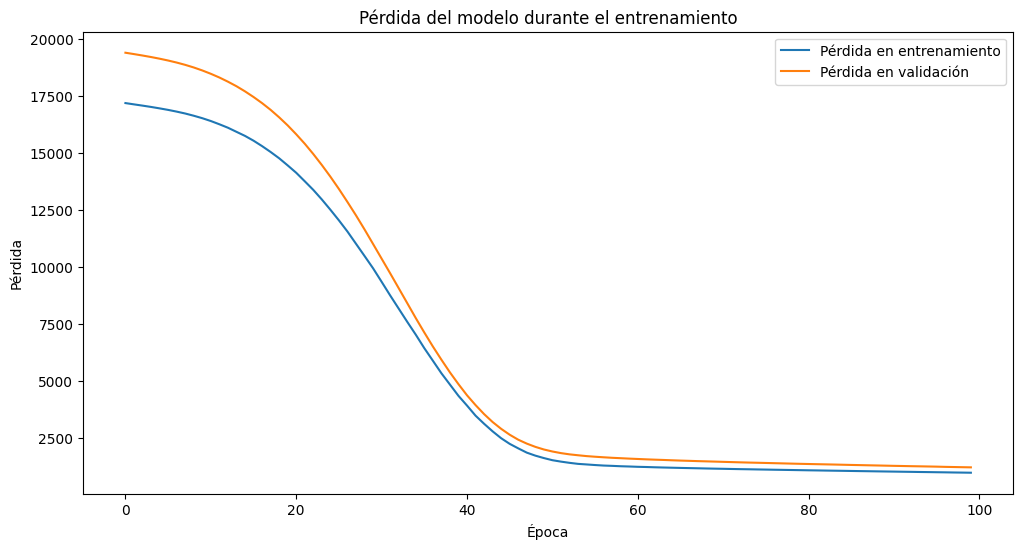

In [254]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida del modelo durante el entrenamiento')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()

Preparar datos para predicción futura

In [255]:
future_date = datetime.strptime('2026-05-21', '%Y-%m-%d')
future_data = {'year': [future_date.year], 'month': [future_date.month], 'day': [future_date.day], 'day_of_week': [future_date.weekday()]}
future_df = pd.DataFrame(future_data)
future_scaled = scaler.transform(future_df)

Hacer la predicción

In [256]:
future_prediction = model.predict(future_scaled)
future_prediction_int = int(round(future_prediction[0][0]))  # Convertir la predicción a un valor entero
print(f'Predicción de nuevas conexiones para {future_date.date()}: {future_prediction_int}')


1/1 [==============================] - 0s 161ms/step
Predicción de nuevas conexiones para 2026-05-21: 109


Sumar el total de conexiones actuales a la predicción futura

In [257]:
total_conexiones_futuras = total_conexiones_actuales + future_prediction_int
print(f'Total de conexiones para {future_date.date()}: {total_conexiones_futuras}')

Total de conexiones para 2026-05-21: 344


Calcular conexiones actuales por género

In [258]:
current_gender_counts = df['Gender'].value_counts()

Asumir que la proporción de género se mantendrá igual para las conexiones futuras

In [259]:
proportion_male = current_gender_counts['Male'] / total_conexiones_actuales
proportion_female = current_gender_counts['Female'] / total_conexiones_actuales
proportion_unknown = current_gender_counts['Unknown'] / total_conexiones_actuales

future_male = round(proportion_male * total_conexiones_futuras)
future_female = round(proportion_female * total_conexiones_futuras)
future_unknown = round(proportion_unknown * total_conexiones_futuras)

Graficar la comparación actual y futura por género

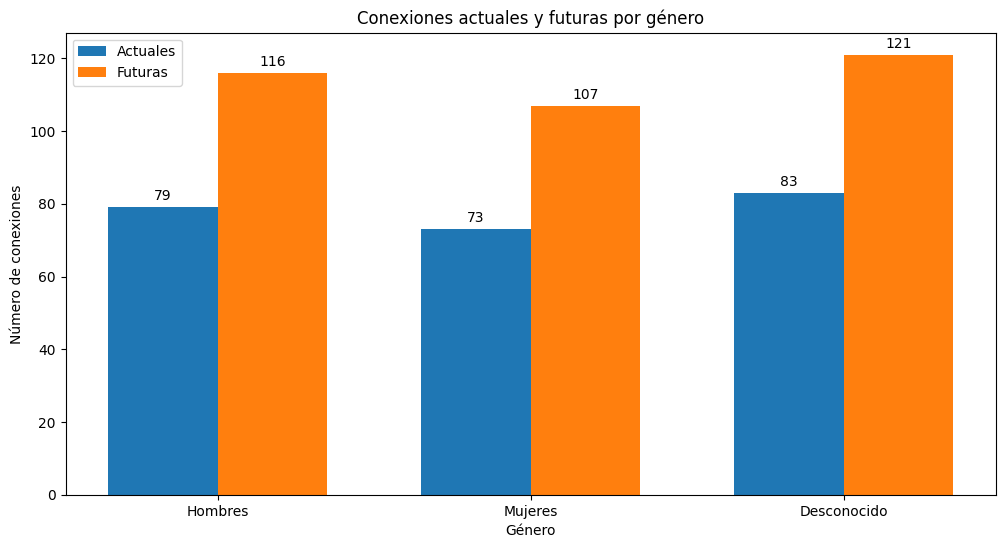

In [264]:
labels = ['Hombres', 'Mujeres', 'Desconocido']
current_counts = [current_gender_counts['Male'], current_gender_counts['Female'], current_gender_counts['Unknown']]
future_counts = [future_male, future_female, future_unknown]

x = np.arange(len(labels))
width = 0.35  # ancho de las barras

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, current_counts, width, label='Actuales')
rects2 = ax.bar(x + width/2, future_counts, width, label='Futuras')

#Añadir etiquetas, título y leyenda
ax.set_xlabel('Género')
ax.set_ylabel('Número de conexiones')
ax.set_title('Conexiones actuales y futuras por género')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
#Añadir etiquetas en las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento hacia arriba
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


**Interpretación en el Contexto del Problema**

***Gráfica Pérdida del modelo durante el entrenamiento***

- **Pérdida en entrenamiento (línea azul)**: La pérdida del modelo disminuye constantemente a medida que avanza el entrenamiento, estabilizándose alrededor de la época 60.
- **Pérdida en validación (línea naranja)**: La pérdida en validación también disminuye de manera similar y se estabiliza, aunque comienza ligeramente más alta que la pérdida en entrenamiento.
Interpretación:

El modelo muestra una buena capacidad de aprendizaje, ya que la pérdida disminuye de manera constante tanto en el conjunto de entrenamiento como en el de validación.
La diferencia entre las pérdidas de entrenamiento y validación es mínima, lo cual sugiere que el modelo no está sobreajustando y generaliza bien en datos no vistos.
A partir de la época 60, la mejora en la pérdida se estabiliza, lo que indica que más entrenamiento podría no llevar a mejoras significativas adicionales.

***Gráfica Conexiones actuales y futuras por género***

**Actuales**: El gráfico de barras azul muestra las conexiones actuales por género.

* Hombres: 79 conexiones actuales.
* Mujeres: 73 conexiones actuales.
* Desconocido: 83 conexiones actuales.


**Futuras**: El gráfico de barras naranja muestra las conexiones futuras estimadas por género.

* Hombres: 116 conexiones futuras.
* Mujeres: 107 conexiones futuras.
* Desconocido: 121 conexiones futuras.


**Interpretación**:

Se espera un aumento significativo en el número de conexiones para cada categoría de género.
La mayor parte del incremento está en la categoría "Desconocido," seguida de "Hombres" y "Mujeres."
Esto sugiere que, en el futuro, se mantendrán o incrementarán las tendencias actuales de conexión con una proporción similar entre géneros.


# Conclusiones
- **Incremento de Conexiones Futuras**:
Se predice un aumento considerable en las conexiones futuras, con un patrón de crecimiento similar en todas las categorías de género. Esto puede ser indicativo de una expansión general en la red de contactos.

- **Proporción de Género**:
La proporción de género en las conexiones se mantiene relativamente constante en las predicciones futuras. Esto sugiere que no se espera un cambio significativo en la distribución de género entre las conexiones actuales y futuras.

- **Eficacia del Modelo**:

El modelo de regresión utilizado muestra un buen rendimiento en términos de ajuste a los datos de entrenamiento y validación. La estabilidad en la pérdida a partir de la época 60 indica que el modelo es confiable para hacer predicciones futuras con los datos actuales.

## 6. Retos y Limitaciones ##
**Limitaciones**:
- **Disponibilidad de datos**: La cantidad de datos en el CSV de LinkedIn puede ser limitada.
- **Sesgo en los datos**: Los datos de LinkedIn pueden estar sesgados hacia ciertos sectores o grupos demográficos.
- **Limitaciones del Modelo**: Posible sobreajuste con datos limitados.

**Soluciones/Mejoras**:
- **Más Datos**: Obtener más datos para una mejor representación.
- **Regularización**: Implementar técnicas de regularización para evitar el sobreajuste.